In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [56]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

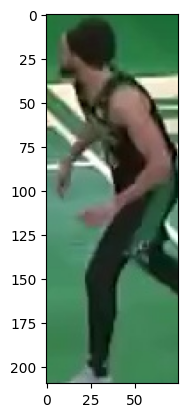

In [57]:
plt.imshow(image)
plt.show()

# take the top half of the image

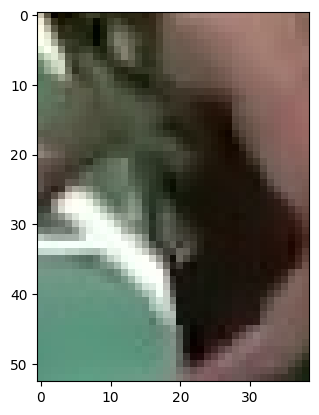

In [58]:
top_half_image = image[int(image.shape[0]/4):-int(image.shape[0]/2), int(image.shape[1]/4):-int(image.shape[1]/4)]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters

{0, 1, 2}


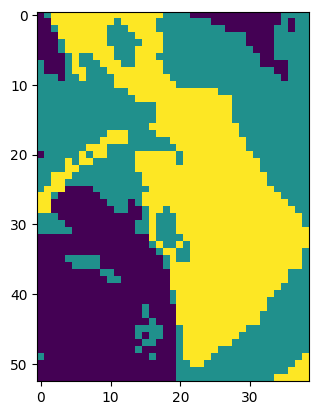

In [59]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(image_2d)

# get the cluster labels
labels = kmeans.labels_
print(set(labels))

# reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [60]:
from collections import defaultdict
print(kmeans.labels_)
print(np.bincount(kmeans.labels_))
print(np.argmax(np.bincount(kmeans.labels_)))
count = defaultdict(int)
for i in range(len(kmeans.labels_)):
    count[kmeans.labels_[i]] += 1
print(count)

dominant_color = kmeans.cluster_centers_[np.argmax(np.bincount(kmeans.labels_))]
dominant_color

[0 1 2 ... 2 2 2]
[511 827 729]
1
defaultdict(<class 'int'>, {0: 511, 1: 827, 2: 729})


array([108.30461165,  96.12135922,  84.5461165 ])

In [61]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
print(corner_clusters)
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

[0, 1, 0, 2]
0


In [62]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [63]:
kmeans.cluster_centers_[0]

array([143.77431907, 169.26070039, 153.08754864])

In [64]:
kmeans.cluster_centers_[1]

array([108.30461165,  96.12135922,  84.5461165 ])